# 7.2 Python Code

In [92]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (7.5,5)
plt.rcParams.update({'font.size': 15})

In [93]:
def e(r4,c4,w):
    C0 = 75.4*(10**-12)
    C2 = 1570*pf
    r1 = 2000
    r3 = 2000
    
    c1 = (C2/r3)*r4
    r = r3*(c4/C2) - r1
    
    e1 = c1/(C0*(1 + (r*w*c1)**2))
    e2 = e1*w*c1*r 
    
    return e1,e2


## Raw Data

In [94]:
nf = 1e-9
uf = 1e-6
pf = 10**-12

C2 = 1570*pf
r1 = 2000
r3 = 2000

W= 2*np.pi*np.array([0.5,1,2,3,4,5,6,7,8
                     ,9,10,11,12,13,14,15,
                     20,30,40,50])*1000

R4 =np.array([12000,10150,8850,8316,8000,
              7860,7760,7560,7400,7300,
              7300,7150,7070,6900,6800,
              6600,6300,5200,4100,3210])

C4 = np.array([14.1,8.8,6.1,5.27,4.9,4.6,
               4.5,4.4,4.3,4.35,4.3,4.24,
               4.21,4.19,4.18,4.15,4.1
               ,4.03,3.94,3.815])*nf

e1,e2 = e(R4,C4,W)
e1,e2

(array([102.14233189,  87.14568446,  73.48709472,  64.78607867,
         57.5090425 ,  52.46297879,  46.5726602 ,  41.7446879 ,
         37.9301608 ,  32.80185325,  29.59616897,  27.1586027 ,
         24.69633703,  22.58697616,  20.59613702,  19.21762494,
         13.08708886,   7.94503857,   6.12939835,   5.45577635]),
 array([48.24896018, 40.18186528, 37.02221639, 37.57500282, 38.5043873 ,
        39.25256061, 39.92008943, 39.28143618, 38.51668536, 37.64336295,
        37.05961247, 35.83416414, 34.75497643, 33.35275369, 32.1545989 ,
        30.84142828, 26.21283451, 19.15735661, 14.96890077, 12.35173055]))

## Uncertainties on the Dielectric constant

In [95]:
R1 = 2000
R3 = 2000
C0 = 75.7*(10**-12)
c2 = 1.57*(10**-9)
C2 = 1.57*(10**-9)

r = R3*C4/c2 - R1
C1 = C2*R4/R3


#Input arrays containg uncertainties on R4 and C4

dc2 =0.005*nf
dc0 = 0.05*pf
dr1 = 2
dr3 = 2
dr4 = np.array([500,5,5,5,50,5,5,5,
                50,50,50,5,5,50,50,
                50,50,50,50,5  ])

dc4 = np.array([ 0.05,0.05,0.05,0.005,
                0.05,0.05,0.05,0.05,
                0.05,0.005,0.05,0.005,0.005
               ,0.005,0.005,0.005,0.05
                ,0.005,0.005,0.0005])*nf

dC1 = np.sqrt(  ((R4/R3)*dc2)**2  +  ((c2/R3)*dr4)**2  +((-c2*R4/R3**2) * dr3 )**2     )

dr = np.sqrt( ((C4/c2)*dr3)**2 + ((R3/c2)*dc4)**2   + ((-R3*C4/c2**2)*dc2)**2 + dr1**2    )

de1 = np.sqrt(  (((1/(C0*(1+(r*C1*W)**2))**2)  *  ( (1-(r*C1*W)**2)*dC1)**2 + 
        ((-C1/C0  * dc0)**2   + (((-2*C1**3 * r * W**2)) *dr )**2) )))

de2 = np.sqrt(  ( (W*C1*r*de1)**2 + (W*e1*r*dC1)**2 
                 + (W*e1*C1*dr)**2   )   )


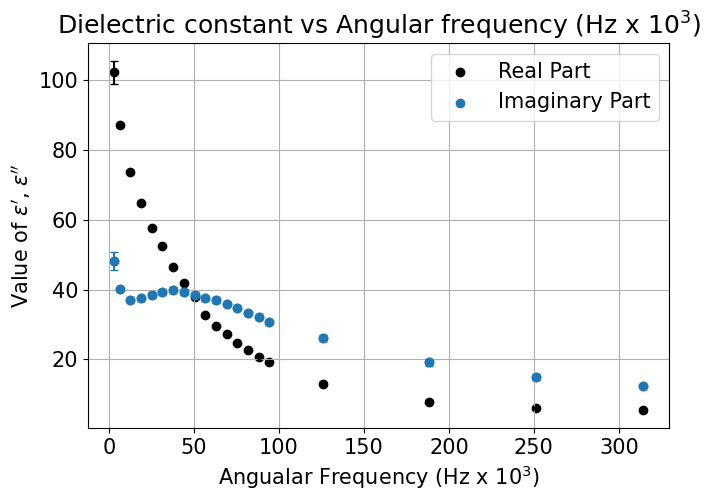

In [96]:
plt.scatter(W/1000,e1,label = "Real Part",color = 'k')
plt.scatter(W/1000,e2,label = "Imaginary Part")
plt.errorbar(W/1000,e1,yerr = de1,fmt='.k',capsize = 3)
plt.errorbar(W/1000,e2,yerr = de2,fmt="o",capsize = 3)

plt.grid()
plt.legend()
plt.xlabel(r'Angualar Frequency (Hz x $10^3$)')
plt.ylabel(r"Value of $\epsilon'$, $\epsilon''$")
plt.title(r'Dielectric constant vs Angular frequency (Hz x $10^3$)')

plt.show()

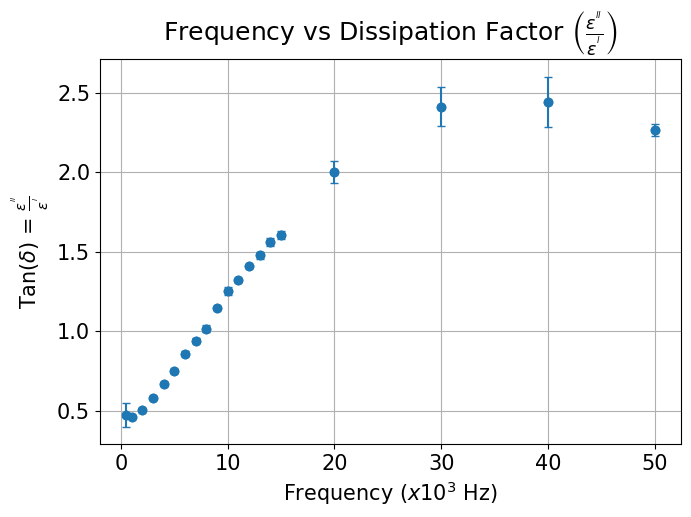

In [97]:
err_diss = np.sqrt( (de2/e1)**2 + ((e2/e2**2)*de1)**2)


plt.scatter(W/(2*np.pi *1000),e2/e1)
plt.errorbar(W/(2*np.pi*1000),e2/e1,yerr =   err_diss,fmt="o",capsize = 3)
plt.xlabel(r"Frequency ($x 10^3$ Hz)")
plt.ylabel(r"Tan($\delta$) = $\frac{\epsilon^{^{ll}}}{\epsilon^{^{l}}}$")
plt.title(r"Frequency vs Dissipation Factor $\left(\frac{\epsilon^{^{ll}}}{\epsilon^{^{l}}}\right)$")
plt.grid()
plt.show()

##  Orthoganal Distance Regression approach to Finding the Optical and Static Dielectric Constants:

Beta: [-2.47759783e-05  8.61871417e+01]
Beta Std Error: [1.35010964e-06 1.69326191e+00]
Beta Covariance: [[ 1.81025018e-14 -1.80208754e-08]
 [-1.80208754e-08  2.84740209e-02]]
Residual Variance: 100.69304592770283
Inverse Condition #: 4.849817743066131e-07
Reason(s) for Halting:
  Sum of squares convergence
Beta: [3.58802308e+04 5.86562519e+00]
Beta Std Error: [3.52067496e+03 1.68173433e+00]
Beta Covariance: [[ 2.72731641e+04 -9.09353026e+00]
 [-9.09353026e+00  6.22298057e-03]]
Residual Variance: 454.48163313586747
Inverse Condition #: 3.420538975942512e-05
Reason(s) for Halting:
  Sum of squares convergence


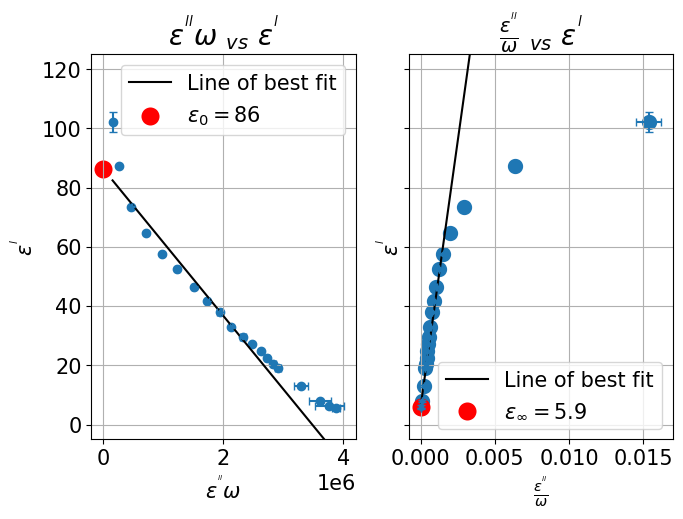

In [98]:
from scipy.odr import *
fig, axs = plt.subplots(1,2, sharex=False, sharey=True)

def func(p,x):   #The relationship between the X and Y data is a linear one
    m,c = p
    return m*x + c

#First for the static dielectric constant

x = e2*W
y  = e1 
dx = de2*W
dy = de1


#Using ODR to find the line of best fit, and hence the Y-intercept ( = static/optical dielectric constant)
model = Model(func)
data= RealData(x,y,sx = dx ,sy =dy)
odr = ODR(data,model,beta0=[80,90])
out = odr.run()
out.pprint()
x_fit = e2*W
y_fit = func(out.beta,x_fit)

Intercept1 = out.beta[1]
err_Intercept1 = out.sd_beta[1]

axs[0].plot(x_fit , y_fit,color = 'black',label = "Line of best fit")
axs[0].scatter(x,y)
axs[0].scatter(0,Intercept1,color='red',linewidth = 7,label = r"$\epsilon_{0} =86$")
axs[0].set_xlabel(r'$\epsilon^{^{^{ll}}}\omega $')
axs[0].set_ylabel(r'$\epsilon^{^{l}}  $')

axs[0].errorbar(x,y,yerr = dy,xerr = dx,fmt='.',capsize = 3)

# Now the same for the optical dielectric constant
x1 = e2/W
y1  = e1 
dx1 = de2/W
dy1 = de1

data1= RealData(x1,y1,sx = dx1 ,sy =dy1)
odr1 = ODR(data1,model,beta0=[0,15])
out1 = odr1.run()
out1.pprint()
x_fit1 = e2/W
y_fit1 = func(out1.beta,x_fit1)

Intercept2 = out1.beta[1]
err_Intercept2 = out1.sd_beta[1]

axs[1].plot(x_fit1,y_fit1,color = 'black',label = "Line of best fit")
axs[1].scatter(e2/W, e1,linewidth = 5)
axs[1].scatter(0,Intercept2,color = 'red',linewidth = 7,label = r"$\epsilon_{\infty}  =5.9$")
axs[1].set_ylabel(r'$\epsilon^{^{l}}$')
axs[1].set_xlabel(r'$\frac{\epsilon^{^{ll}}}{\omega} $')
axs[1].errorbar(x1,y1,yerr = dy1,xerr = dx1,fmt='.',capsize = 3)

axs[1].grid()
axs[0].grid()

axs[1].legend(prop={'size':15} )
axs[0].legend(prop={'size':15} )

axs[1].set_title(r'$\frac{\epsilon^{^{ll}}}{\omega}$ $_{ vs }$ $ \epsilon^{^{l}}$',fontsize = 20)
axs[0].set_title(r'$\epsilon^{^{ll}}\omega$ $_{ vs }$ $ \epsilon^{^{l}}$',fontsize = 20)

plt.ylim(-5,125)

Intercept1 , err_Intercept1 , Intercept2 , err_Intercept2
plt.show()

## Relaxation time

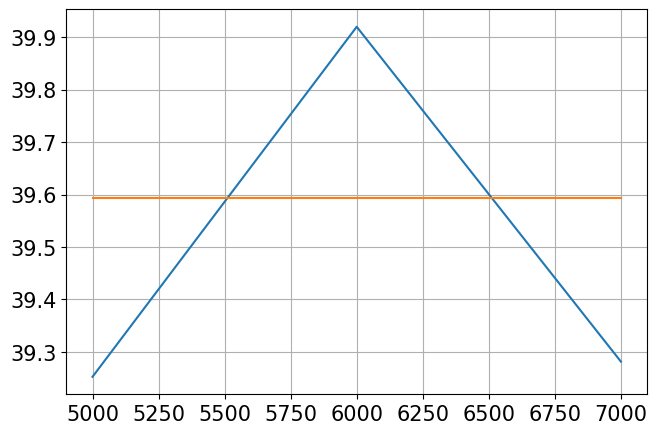

In [99]:
emax = np.array([e2[5],e2[6],e2[7]])
w = np.array([W[5],W[6],W[7]])/(2*np.pi)
plt.plot(w,emax)


half_max = ( e2[6] - 0.5*(e2[7]+e2[5]))/2
plt.plot(w,np.array([e2[6]-half_max,e2[6]-half_max,e2[6]-half_max]))
plt.grid()
plt.show()

In [100]:
wmax = 2*np.pi*6000
dwmax = 2*np.pi*500

T = 1/wmax

DT = (1/wmax)**2  *dwmax
T,DT,wmax,dwmax


(2.6525823848649224e-05,
 2.2104853207207687e-06,
 37699.11184307752,
 3141.592653589793)

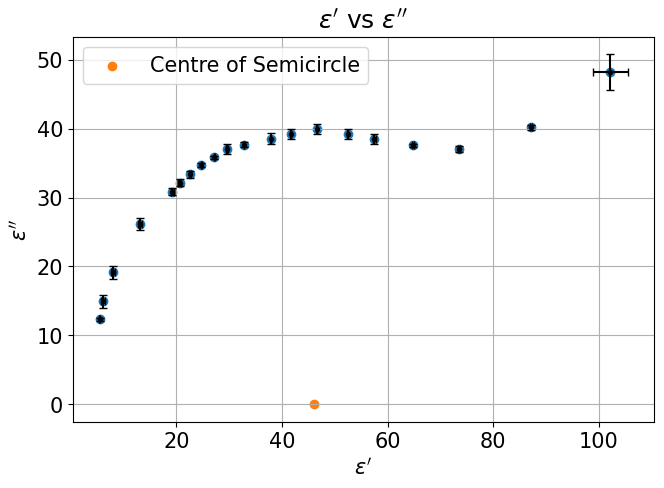

In [101]:
plt.scatter(e1,e2)
plt.errorbar(e1,e2,xerr=de1,yerr=de2,fmt = '.k',capsize = 3)
plt.title(r"$\epsilon'$ vs $\epsilon ''$")
plt.xlabel(r"$\epsilon'$")
plt.ylabel(r"$\epsilon''$")

plt.scatter(0.5*(Intercept1 + Intercept2 ),0, label = "Centre of Semicircle")
plt.legend()
plt.grid()
plt.show()